<a href="https://colab.research.google.com/github/leoleeiamai/ai-finance-portfolio/blob/main/Python_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Week 1 – Day 2 : Python & Pandas Basics for Finance


In [ ]:
!pip -q install  pandas numpy matplotlib scikit-learn statsmodels plotly pandas-datareader yfinance

import sys, pandas, numpy, matplotlib, sklearn, statsmodels, plotly
print("Python:", sys.version.split()[0])
print("Pandas:", pandas.__version__)
print("Numpy:", numpy.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Scikit-Learn:", sklearn.__version__)
print("Statsmodels:", statsmodels.__version__)
print("Plotly:", plotly.__version__)

# Simple arithmetic
principal = 1000
rate = 0.05
years = 5
future_value = principal * (1 + rate) ** years
print(f"Future value after {years} years = £{future_value:.2f}")

# Lists and loops
stocks = ["HSBA.L", "BP.L", "AZN.L", "VOD.L", "LLOY.L"]
for s in stocks:
    print("Tracking:", s)

# Dictionaries
prices = {"HSBA.L": 610, "BP.L": 470, "AZN.L": 12200}
print("Price of AZN:", prices["AZN.L"])

# Functions
def CAGR(start, end, years):
    """Compound Annual Growth Rate"""
    return (end / start) ** (1 / years) - 1

print("Example CAGR:", CAGR(100, 150, 5))


Python: 3.12.12
Pandas: 2.2.2
Numpy: 2.0.2
Matplotlib: 3.10.0
Scikit-Learn: 1.6.1
Statsmodels: 0.14.5
Plotly: 5.24.1
Future value after 5 years = £1276.28
Tracking: HSBA.L
Tracking: BP.L
Tracking: AZN.L
Tracking: VOD.L
Tracking: LLOY.L
Price of AZN: 12200
Example CAGR: 0.08447177119769855


In [ ]:
!pip -q install yfinance pandas numpy
import pandas as pd, numpy as np, yfinance as yf

data = {'Stock': ['A', 'B', 'C'], 'Price': [100, 95, 120]}
df = pd.DataFrame(data)
print(df)
print(df.describe())

df['Deviation'] = df['Price'] / df['Price'].mean() - 1
print(df.sort_values('Deviation', ascending=False))

df_hsbc = yf.download("HSBA.L", start="2015-01-01")



  Stock  Price
0     A    100
1     B     95
2     C    120
            Price
count    3.000000
mean   105.000000
std     13.228757
min     95.000000
25%     97.500000
50%    100.000000
75%    110.000000
max    120.000000
  Stock  Price  Deviation
2     C    120   0.142857
0     A    100  -0.047619
1     B     95  -0.095238


/tmp/ipython-input-978481888.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_hsbc = yf.download("HSBA.L", start="2015-01-01")
[*********************100%***********************]  1 of 1 completed


HSBC CAGR: 4.36%
HSBC CAGR 4.36% from 2015 to 2025


/tmp/ipython-input-942344093.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  start_price = float(df[col].iloc[0])
/tmp/ipython-input-942344093.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  end_price = float(df[col].iloc[-1])


<Axes: title={'center': 'HSBC Price (GBP)'}, xlabel='Date'>

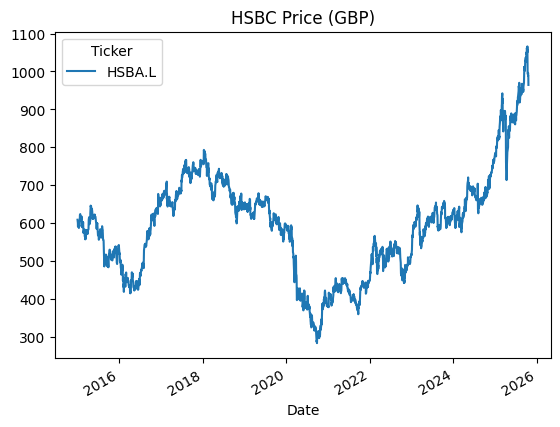

In [ ]:
start_price = df_hsbc['Close'].iloc[0]
end_price = df_hsbc['Close'].iloc[-1]
years = (df_hsbc.index[-1] - df_hsbc.index[0]).days / 365
cagr = (end_price / start_price) ** (1/years) - 1


def get_cagr(df, col='Close'):
    """Compute CAGR from first to last observation in a DataFrame."""
    start_price = float(df[col].iloc[0])
    end_price = float(df[col].iloc[-1])
    years = (df.index[-1] - df.index[0]).days / 365
    return (end_price / start_price) ** (1 / years) - 1

cagr = get_cagr(df_hsbc)
print(f"HSBC CAGR: {cagr:.2%}")



print(f"HSBC CAGR {cagr:.2%} from 2015 to 2025")


df_hsbc['Close'].plot(title='HSBC Price (GBP)')